In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression

###ChiSquare ###

In [2]:
observed = [[10,13,15,17],
            [15,14,13,12]]

expected = [[11,14,16,18],
            [16,15,11,13]]

chi2_stats , pval,dof,expected_table = stats.chi2_contingency(observed,expected)
print("Chi-Square statsitics =",chi2_stats)
print("P- Value =",pval)
print("Degree of freedom =",dof)
print("Expected table = \n",expected_table)

Chi-Square statsitics = 2.0329599436559835
P- Value = 0.565594004675559
Degree of freedom = 3
Expected table = 
 [[12.6146789  13.62385321 14.12844037 14.63302752]
 [12.3853211  13.37614679 13.87155963 14.36697248]]


###chi-square using function###

In [3]:
def cal_chi_Square(observed,expected):
  return np.sum((observed - expected)**2/expected)

def main():

  observed = np.array([10,12,13,14,15])
  expected = np.array([12,14,15,12,16])

  chi_Square = cal_chi_Square(observed,expected)
  print("chi square statistics :",chi_Square)

if __name__=="__main__":
  main()

chi square statistics : 1.281547619047619


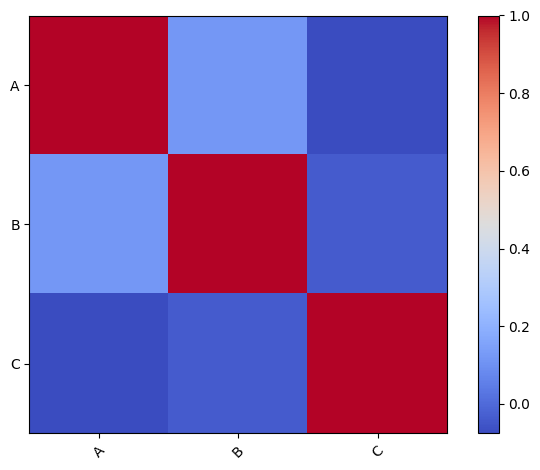

In [4]:
data = {'A':[1,2,4,5,3],
        'B':[2,3,4,2,5],
        'C':[4,6,7,3,2]}
df = pd.DataFrame(data)

correlation = df.corr()

plt.imshow(correlation,cmap = 'coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation.columns)),correlation.columns,rotation=45)
plt.yticks(range(len(correlation.columns)),correlation.columns)
plt.tight_layout()
plt.show()


###Logistics Regressions###

In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression

x = np.array([[1,2],[3,4],[5,1],[6,0]])
y = np.array([0,1,1,0])

model = LogisticRegression()
model.fit(x,y)

new_data = np.array([[7,3]])
predictions = model.predict(new_data)

print("Predicted class labels:",predictions)

probabilities = model.predict_proba(new_data)
print("predicted probabilites :",probabilities)

Predicted class labels: [1]
predicted probabilites : [[0.10139762 0.89860238]]


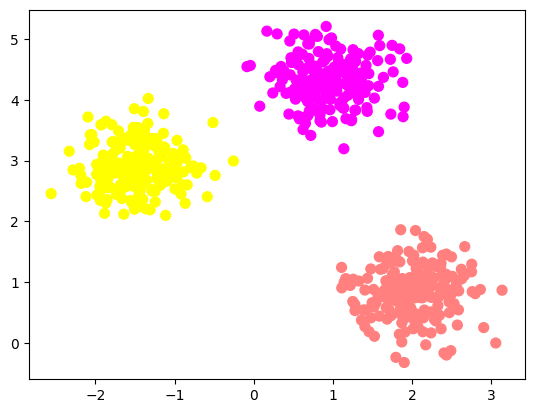

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples=600, centers = 3,random_state=0,cluster_std=0.40)

plt.scatter(x[:,0],x[:,1], c=y,s=50,cmap='spring');
plt.show()

#SVM#

In [7]:
from sklearn.svm  import SVC

x = [[0],[1],[2],[3]]
y = [0,1,2,3]

clf = SVC(kernel='linear')
clf.fit(x,y)

SVC(kernel='linear')

Accuracy : 0.7407407407407407


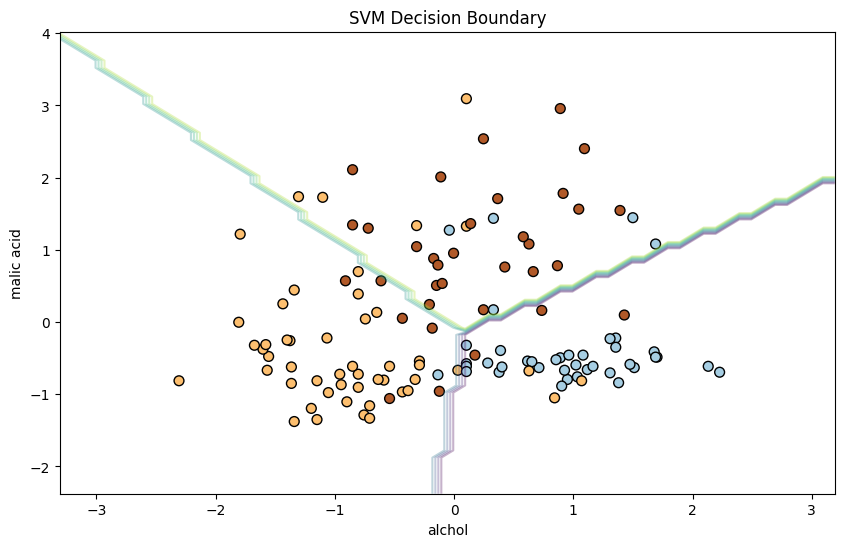

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Wine = datasets.load_wine()
x = Wine.data[:,:2]
y = Wine.target

x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

scaler = StandardScaler()
x_trained_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

svm_model = SVC(kernel = 'linear',C=1,random_state=42)
svm_model.fit(x_trained_scaled,y_train)

y_pred = svm_model.predict(x_test_scaled)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

def plot_decision_boundary(x,y,model):
  x_min,x_max = x[:,0].min()-1 , x[:,0].max()+1
  y_min,y_max = x[:,1].min()-1 , x[:,1].max()+1
  xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1),
                      np.arange(y_min,y_max,0.1))
  z = model.predict(np.c_[xx.ravel(),yy.ravel()])
  z = z.reshape(xx.shape)
  plt.contour(xx,yy,z,alpha=0.3)
  plt.scatter(x[:,0],x[:,1],c=y,s=50,edgecolors='k',cmap=plt.cm.Paired)
  plt.xlabel('alchol')
  plt.ylabel('malic acid')
  plt.title('SVM Decision Boundary')

plt.figure(figsize=(10,6))
plot_decision_boundary(x_trained_scaled,y_train,svm_model)
plt.show()

##Confusion Matrix##

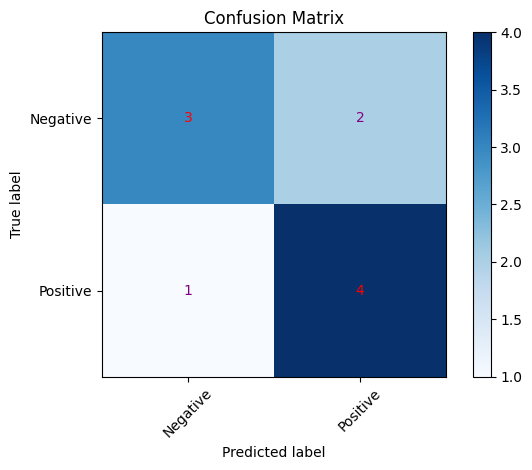

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


true_labels = np.array([1,0,1,1,0,1,0,0,1,0])
predicted_labels = np.array([1,1,0,1,0,1,0,1,1,0])

cm = confusion_matrix(true_labels,predicted_labels)

plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Negative','Positive']
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks,classes,rotation = 45)
plt.yticks(tick_marks,classes)

fmt = 'd'
thresh = cm.max() / 2
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    plt.text(j,i,format(cm[i,j],fmt),
             ha = "center",va = "center",
             color="red" if cm[i,j]>thresh else "purple" )

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


[[2 2]
 [1 5]]


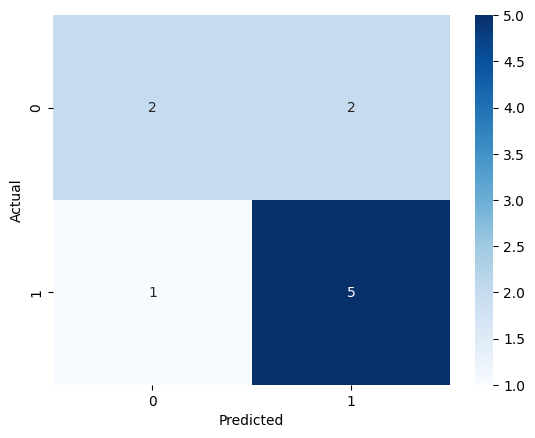

In [10]:
actual = [1, 0, 1, 1, 0, 0, 1, 1, 0, 1]
predicted = [1, 1, 1, 1, 0, 1, 0, 1, 0, 1]

cm = confusion_matrix(actual, predicted)
print(cm)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##PCA: Principal Component Analysis##



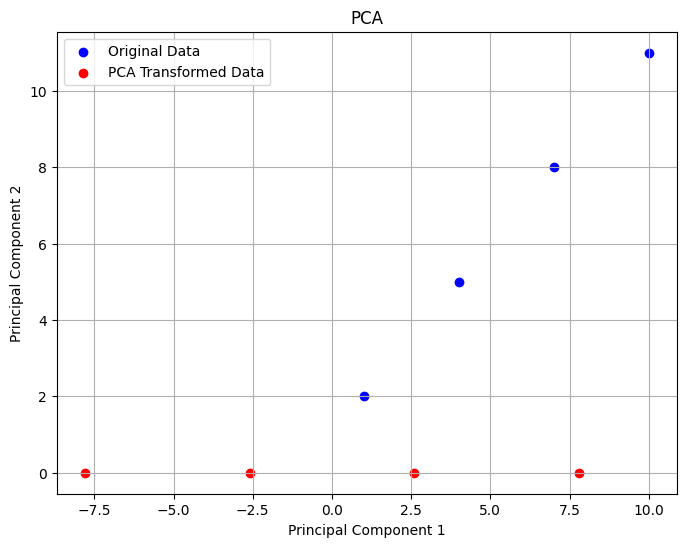

In [11]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Original Data')

plt.scatter(principal_components[:, 0], principal_components[:, 1], color='red', label='PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
import numpy as np
from sklearn.decomposition import PCA

data = np.array([
[10,12,11],
[13,15,17],
[11,9,10],
])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)
pca.fit(data_scaled)

data_reduced = pca.transform(data_scaled)


print("Explained variance ratio:", pca.explained_variance_ratio_)

print("First principal component:", data_reduced[:, 0])
print("Second principal component:", data_reduced[:, 1])

data_original_projected = pca.inverse_transform(data_reduced)
print("Original data projected back:", data_original_projected)


Explained variance ratio: [0.88462035 0.11537965]
First principal component: [-0.92328883  2.28960637 -1.36631754]
Second principal component: [ 0.76229427 -0.09237562 -0.66991865]
Original data projected back: [[-1.06904497e+00 -1.14170151e-16 -5.39163866e-01]
 [ 1.33630621e+00  1.22474487e+00  1.40182605e+00]
 [-2.67261242e-01 -1.22474487e+00 -8.62662186e-01]]


In [13]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=4, n_classes=2, random_state=42)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.875


Accuracy: 1.0


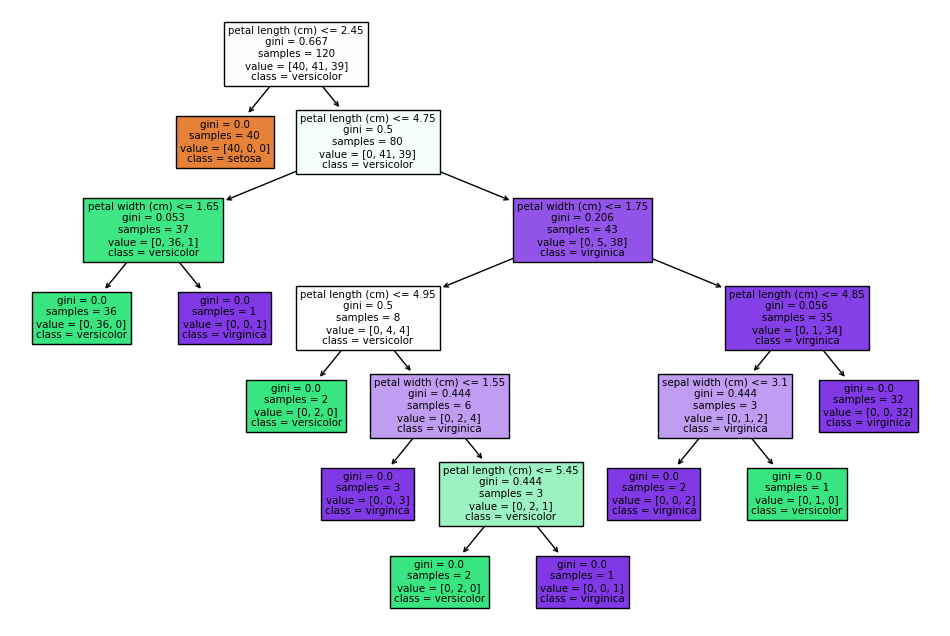

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)


plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()